In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Importing csv files for wildfires and for census years.
wildfires = pd.read_csv("NOAA_csvs/wildfires_2010_2019.csv")
combo = pd.read_csv("NOAA_csvs/combined_zone_county_data.csv")
census_data_2010 = pd.read_csv(f"Census_csvs/2010_census_data_ca_county.csv")
census_data_2011 = pd.read_csv(f"Census_csvs/2011_census_data_ca_county.csv")
census_data_2012 = pd.read_csv(f"Census_csvs/2012_census_data_ca_county.csv")
census_data_2013 = pd.read_csv(f"Census_csvs/2013_census_data_ca_county.csv")
census_data_2014 = pd.read_csv(f"Census_csvs/2014_census_data_ca_county.csv")
census_data_2015 = pd.read_csv(f"Census_csvs/2015_census_data_ca_county.csv")
census_data_2016 = pd.read_csv(f"Census_csvs/2016_census_data_ca_county.csv")
census_data_2017 = pd.read_csv(f"Census_csvs/2017_census_data_ca_county.csv")
census_data_2018 = pd.read_csv(f"Census_csvs/2018_census_data_ca_county.csv")
census_data_2019 = pd.read_csv(f"Census_csvs/2019_census_data_ca_county.csv")

In [18]:
# Drop undated fires.
combo.dropna(subset=['Begin_Date','County'],inplace=True)
# Group by NOAA FIP
combo.groupby("NOAA_FIP")
combo_counts = pd.DataFrame(combo["County"].value_counts())
combo_counts = combo_counts.reset_index()
combo_counts.rename(columns={"index":"County","County":"Fires"},inplace=True)
combo_counts = combo_counts.sort_values("Fires",ascending=False)
combo_counts.set_index("County")
combo_counts.reset_index(inplace=True)
combo_counts.drop(columns=["index"],inplace=True)
combo_counts

,County,Fires
0,San Bernardino,47
1,Riverside,45
2,Siskiyou,40
3,San Diego,30
4,Los Angeles,22
5,Modoc,19
6,Ventura,19
7,Nevada,19
8,Yuba,18
9,Amador,17


In [4]:
def rename_location(fire):
    name = fire.partition(" COUNTY")
    fire = str(name[0] + name[1])
    return fire
def filter_counties(list1, list2):
    return ([i for i in list1 if
             any(j in i for j in list2)])

In [5]:
# PROBABLY WANT TO USE THIS ELSEWHERE LATER ON BUT FOR NOW WANT ALL COLUMNS ------------------------------
# Makes smaller DataFrame from wildfires for relevant columns.
# wildfires = wildfires[['EVENT_ID','CZ_NAME_STR','CZ_FIPS']]

# Variables for parsing lists.
fire = ""
new_names = []
chosen_names = []
substring = "(ZONE)"
census_names = [census_data_2010["Name"]]

# Parses through both lists of counties and pulls out only shared values.
for fire in wildfires["CZ_NAME_STR"]:
    fire = rename_location(fire)
    new_names.append(fire)
wildfires["CZ_NAME_STR"] = new_names
for name in new_names:
    if substring not in name:
        if name not in chosen_names:
            chosen_names.append(name.title())
for name in census_data_2010['Name']:
    census_names.append(name.title())
list1 = census_names
list2 = chosen_names
utile_counties = filter_counties(list1, list2)
for county in range(len(utile_counties)):
    utile_counties[county] = utile_counties[county].upper()

In [6]:
# Reduces NOAA data to rows found in the usable counties. (119 Fires in Ten Years)
chosen_fires = pd.DataFrame()
chosen_fires = wildfires[wildfires["CZ_NAME_STR"].isin(utile_counties)]
# Renames columns.
chosen_fires = chosen_fires[['EVENT_ID','CZ_NAME_STR','CZ_FIPS']]
chosen_fires.rename(columns={"EVENT_ID":"Fire ID","CZ_NAME_STR":"County Name","CZ_FIPS":"FIP"}, inplace=True)

In [7]:
# Fire counts by county. Renames columns.
county_fires = pd.DataFrame(chosen_fires["County Name"].value_counts())
county_fires = county_fires.reset_index()
county_fires.rename(columns={"index":"County","County Name":"Fires"},inplace=True)
county_fires = county_fires.sort_values("Fires",ascending=False)
county_fires.set_index("County")
county_fires.reset_index(inplace=True)
county_fires.drop(columns=["index"],inplace=True)
county_fires

,County,Fires
0,SAN DIEGO COUNTY,25
1,VENTURA COUNTY,19
2,LOS ANGELES COUNTY,16
3,MODOC COUNTY,16
4,SAN BERNARDINO COUNTY,14
5,SANTA BARBARA COUNTY,11
6,TULARE COUNTY,6
7,RIVERSIDE COUNTY,6
8,SAN LUIS OBISPO COUNTY,4
9,ORANGE COUNTY,2


# Below Here is Analysis, Not Cleaning

In [8]:
# Converts counties to title case.
for county in range(len(utile_counties)):
    utile_counties[county] = utile_counties[county].title()   
    
# Parsing all census data to only include selected counties.
census_data_2010 = census_data_2010[census_data_2010["Name"].isin(utile_counties)]
census_data_2011 = census_data_2011[census_data_2011["Name"].isin(utile_counties)]
census_data_2012 = census_data_2012[census_data_2012["Name"].isin(utile_counties)]
census_data_2013 = census_data_2013[census_data_2013["Name"].isin(utile_counties)]
census_data_2014 = census_data_2014[census_data_2014["Name"].isin(utile_counties)]
census_data_2015 = census_data_2015[census_data_2015["Name"].isin(utile_counties)]
census_data_2016 = census_data_2016[census_data_2016["Name"].isin(utile_counties)]
census_data_2017 = census_data_2017[census_data_2017["Name"].isin(utile_counties)]
census_data_2018 = census_data_2018[census_data_2018["Name"].isin(utile_counties)]
census_data_2019 = census_data_2019[census_data_2019["Name"].isin(utile_counties)]


In [9]:
# Fire Count columns for all years.
fire = pd.DataFrame(county_fires["County"]).sort_values("County")
fire["County"] = fire["County"].str.title()
fire = fire.set_index("County").reset_index()
fire["2010 Fires"] = ""
fire["2011 Fires"] = ""
fire["2012 Fires"] = ""
fire["2013 Fires"] = ""
fire["2014 Fires"] = ""
fire["2015 Fires"] = ""
fire["2016 Fires"] = ""
fire["2017 Fires"] = ""
fire["2018 Fires"] = ""
fire["2019 Fires"] = ""
# Population columns for all years.
pop = pd.DataFrame(county_fires["County"]).sort_values("County")
pop["County"] = pop["County"].str.title()
pop = pop.set_index("County").reset_index()
pop["2010 Pop."] = ""
pop["2011 Pop."] = ""
pop["2012 Pop."] = ""
pop["2013 Pop."] = ""
pop["2014 Pop."] = ""
pop["2015 Pop."] = ""
pop["2016 Pop."] = ""
pop["2017 Pop."] = ""
pop["2018 Pop."] = ""
pop["2019 Pop."] = ""

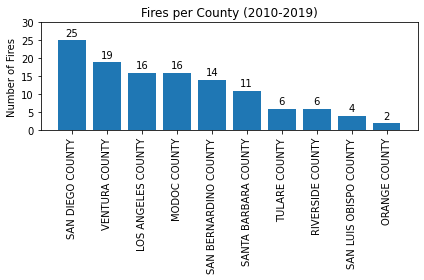

In [10]:
# Bar graphing.
x_values = county_fires["County"]
y_values = county_fires["Fires"]
plt.bar(x_values, y_values)
plt.xticks(rotation='vertical')
plt.yticks([0,5,10,15,20,25,30])
plt.ylabel("Number of Fires")
plt.title("Fires per County (2010-2019)")
for i, v in enumerate(y_values):
    plt.text(i,v+2,y_values[i],fontsize=10,ha='center',va='center')
plt.tight_layout()
#plt.savefig("jacob_pngs/CA_County_Fire_Counts.png")